# Background



## Key Concepts to Introduce and/or Review

*   Model, parameter
*   Observation, fit, estimator
*   Error, residual

# OBSERVATION

Anamorphic Art

# Download Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Anscome's Quartet


## Load or Generate

In [2]:
# Anscombe's quartet: CSV writer, summary stats (mean & std dev), and 2x2 plots.
# Data values from Wikipedia / Anscombe (1973).

# ---- Raw data (each dataset has 11 points) ----
x1 = np.array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5], dtype=float)
y1 = np.array([ 8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26,10.84, 4.82, 5.68])

x2 = np.array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5], dtype=float)
y2 = np.array([ 9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

x3 = np.array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5], dtype=float)
y3 = np.array([ 7.46, 6.77,12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

x4 = np.array([ 8,  8,  8,  8,  8,  8,  8, 19,  8,  8,  8], dtype=float)
y4 = np.array([ 6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25,12.50, 5.56, 7.91, 6.89])

# ---- Build a single DataFrame with each dataset's own (x,y) ----
df = pd.DataFrame({
    "x1": x1, "y1": y1,
    "x2": x2, "y2": y2,
    "x3": x3, "y3": y3,
    "x4": x4, "y4": y4,
})

# Save CSV next to the notebook (download via the Files pane)
csv_path = Path("anscombe_quartet.csv")
df.to_csv(csv_path, index=False)
print(f"Saved CSV to {csv_path.resolve()}")

# ---- Compute means and (sample) standard deviations (ddof=1) ----
def mean_std(x):
    return np.mean(x), np.std(x, ddof=1)

stats = []
for k, (x, y) in enumerate([(x1,y1),(x2,y2),(x3,y3),(x4,y4)], start=1):
    xm, xs = mean_std(x)
    ym, ys = mean_std(y)
    stats.append({"dataset": f"Set {k}", "x_mean": xm, "x_std": xs, "y_mean": ym, "y_std": ys})

stats_df = pd.DataFrame(stats)
print("\nMeans and (sample) standard deviations:")
display(stats_df.round(3))

# # ---- Classic 2×2 visualization (each set uses its own x) ----
# fig, axes = plt.subplots(2, 2, figsize=(8, 8))
# pairs = [((x1, y1), "I"), ((x2, y2), "II"), ((x3, y3), "III"), ((x4, y4), "IV")]

# for ax, ((x, y), title) in zip(axes.ravel(), pairs):
#     ax.scatter(x, y)
#     # Optional: add least-squares line to illustrate "same" regression
#     # m, b = np.polyfit(x, y, 1)
#     # xx = np.linspace(min(x), max(x), 100)
#     # ax.plot(xx, m*xx + b)
#     ax.set_title(f"Anscombe {title}")
#     ax.set_xlabel("x")
#     ax.set_ylabel("y")

# fig.suptitle("Anscombe's Quartet", y=0.93)
# fig.tight_layout()
# plt.show()


Saved CSV to /content/anscombe_quartet.csv

Means and (sample) standard deviations:


,dataset,x_mean,x_std,y_mean,y_std
0,Set 1,9.0,3.317,7.501,2.032
1,Set 2,9.0,3.317,7.501,2.032
2,Set 3,9.0,3.317,7.500,2.030
3,Set 4,9.0,3.317,7.501,2.031


# Data Visualization

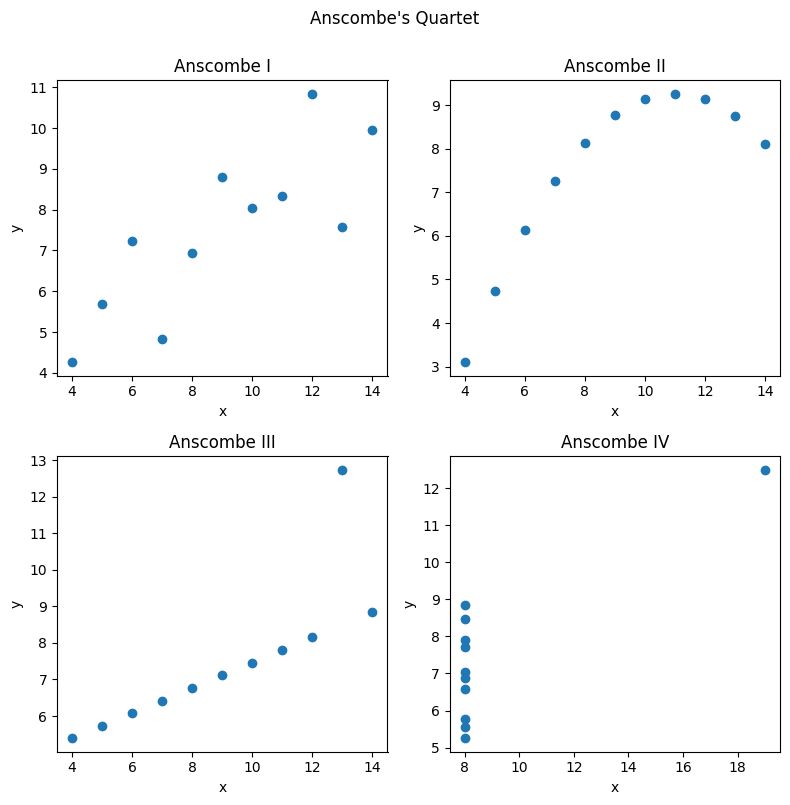

In [3]:
# ---- Classic 2×2 visualization (each set uses its own x) ----
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
pairs = [((x1, y1), "I"), ((x2, y2), "II"), ((x3, y3), "III"), ((x4, y4), "IV")]

for ax, ((x, y), title) in zip(axes.ravel(), pairs):
    ax.scatter(x, y)
    # Optional: add least-squares line to illustrate "same" regression
    # m, b = np.polyfit(x, y, 1)
    # xx = np.linspace(min(x), max(x), 100)
    # ax.plot(xx, m*xx + b)
    ax.set_title(f"Anscombe {title}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

fig.suptitle("Anscombe's Quartet", y=1)
fig.tight_layout()
plt.show()

# Least Squares Fits

## Key Code and Outputs

### Code
``` python
def ols_line(x, y):
    # np.polyfit returns [slope, intercept] for deg=1
    m, b = np.polyfit(x, y, 1)
    yhat = m * x + b
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1.0 - ss_res / ss_tot
    return b, m, r2
```  
### Outputs

$$
\hat{y}_i = m x_i + b
$$

$$
 b=\hat{\beta}_0, m = \hat{\beta}_1
$$

$$
\text{SS}_{\text{res}} = \sum (y_i - \hat{y}_i)^2
$$

$$
\text{SS}_{\text{tot}} = \sum (y_i - \bar{y})^2
$$

$$
R^2 = 1.0 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}
$$

Estimators are indicated with a caret (e.g., $\hat{\boldsymbol{\beta}}$). Averages use bars (e.g., $\bar{x}$). The residual for each observation pair $(x_i, y_i)$ is

$$
e_i = y_i - \hat{y}_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i).
$$

## Definitions and Dataframe

In [4]:
# OLS fits for each of Anscombe’s four datasets + 2×2 plot with regression lines.
# - Loads from 'anscombe_quartet.csv' if present; otherwise falls back to hardcoded values.
# - Uses numpy.polyfit for ordinary least squares (intercept + slope).
# - Prints (intercept, slope) and R^2 for each dataset, then plots all four with fitted lines.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- Load data (CSV if available, else fallback to literals) ----------
def load_anscombe():
    for p in [Path("anscombe_quartet.csv"),
              Path("/mnt/data/anscombe_quartet.csv")]:
        if p.exists():
            df = pd.read_csv(p)
            break
    else:
        # Fallback hardcoded data (same values used in the CSV)
        x1 = np.array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5], dtype=float)
        y1 = np.array([ 8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26,10.84, 4.82, 5.68])
        x2 = np.array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5], dtype=float)
        y2 = np.array([ 9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
        x3 = np.array([10,  8, 13,  9, 11, 14,  6,  4, 12,  7,  5], dtype=float)
        y3 = np.array([ 7.46, 6.77,12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
        x4 = np.array([ 8,  8,  8,  8,  8,  8,  8, 19,  8,  8,  8], dtype=float)
        y4 = np.array([ 6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25,12.50, 5.56, 7.91, 6.89])
        df = pd.DataFrame({"x1":x1,"y1":y1,"x2":x2,"y2":y2,"x3":x3,"y3":y3,"x4":x4,"y4":y4})
    return df

df = load_anscombe()

# Pack datasets as list of (x, y, label)
datasets = [
    (df["x1"].to_numpy(), df["y1"].to_numpy(), "I"),
    (df["x2"].to_numpy(), df["y2"].to_numpy(), "II"),
    (df["x3"].to_numpy(), df["y3"].to_numpy(), "III"),
    (df["x4"].to_numpy(), df["y4"].to_numpy(), "IV"),
]


## Anscome's Quartet Fits

Dataset  Intercept (a)  Slope (b)   R^2
      I          3.000        0.5 0.667
     II          3.001        0.5 0.666
    III          3.002        0.5 0.666
     IV          3.002        0.5 0.667


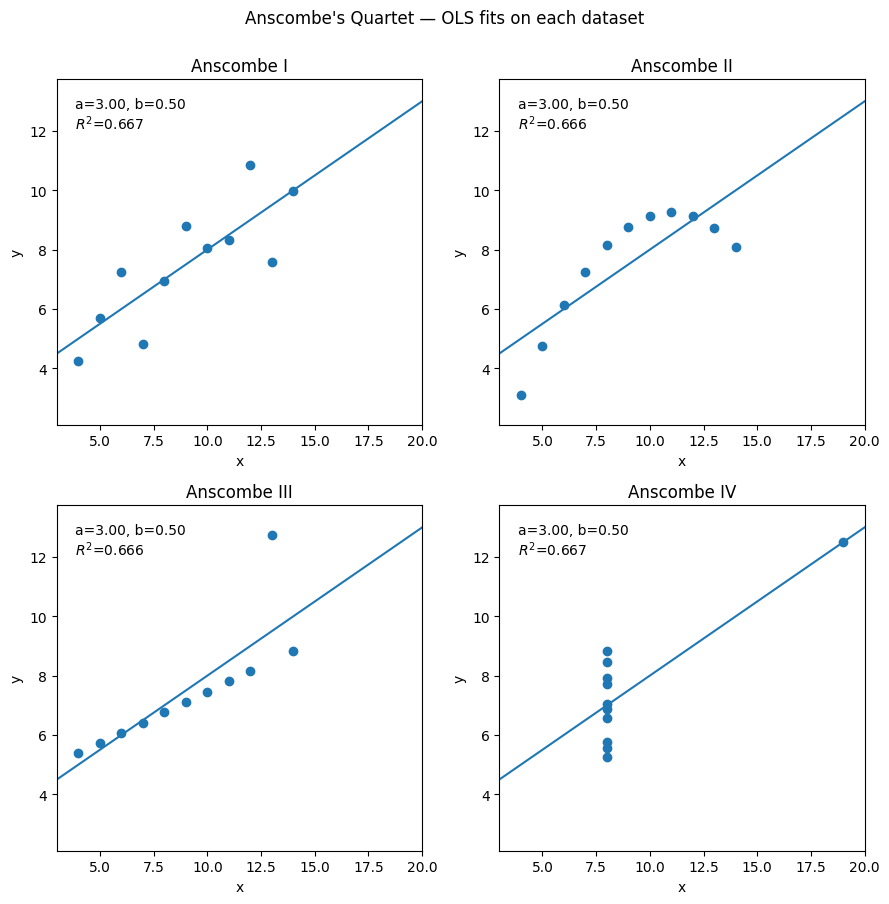

In [5]:
# ---------- Helper: OLS via polyfit + R^2 ----------
def ols_line(x, y):
    # np.polyfit returns [slope, intercept] for deg=1
    m, b = np.polyfit(x, y, 1)
    yhat = m * x + b
    ss_res = np.sum((y - yhat)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1.0 - ss_res / ss_tot
    return b, m, r2

# Print a small table of results
rows = []
for (x, y, lab) in datasets:
    b, m, r2 = ols_line(x, y)
    rows.append((lab, b, m, r2))
res_df = pd.DataFrame(rows, columns=["Dataset", "Intercept (a)", "Slope (b)", "R^2"]).round(3)
print(res_df.to_string(index=False))

# ---------- Plot: 2×2 with OLS lines ----------
fig, axes = plt.subplots(2, 2, figsize=(9, 9))

# For consistent axes across panels (optional, helps highlight differences)
all_x = np.concatenate([d[0] for d in datasets])
all_y = np.concatenate([d[1] for d in datasets])
x_min, x_max = all_x.min() - 1, all_x.max() + 1
y_min, y_max = all_y.min() - 1, all_y.max() + 1

for ax, (x, y, lab) in zip(axes.ravel(), datasets):
    b, m, r2 = ols_line(x, y)
    ax.scatter(x, y)

    # Draw the fitted line across the panel's common x-range
    xx = np.linspace(x_min, x_max, 200)
    ax.plot(xx, m*xx + b)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f"Anscombe {lab}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Annotate with fit parameters (rounded to 2–3 decimals)
    ax.text(0.05, 0.95,
            f"a={b:.2f}, b={m:.2f}\n$R^2$={r2:.3f}",
            transform=ax.transAxes,
            ha="left", va="top")

fig.suptitle("Anscombe's Quartet — OLS fits on each dataset", y=1)
fig.tight_layout()
plt.show()


# Curve Fitting by Ordinary Least Squares

## Core Utilities

In [6]:
# Core utilities for the OLS → WLS notebook.
# This block builds the (intercept, x) design matrix for a straight line,
# and solves the (weighted) normal equations:
#     (X^T W X) a = X^T W y
# returning the parameter vector a*, the normal matrix A, and RHS vector b.

import numpy as np
import matplotlib.pyplot as plt  # used by later cells; safe to import here

def design_matrix_linear(x):
    """
    Build the n×2 design matrix for a straight-line model y ≈ a0 + a1*x.

    Parameters
    ----------
    x : array-like of shape (n,)
        Predictor values.

    Returns
    -------
    X : ndarray of shape (n, 2)
        Column 0 is all ones (intercept), column 1 is x.
    """
    # Ensure a NumPy float array
    x = np.asarray(x, dtype=float)

    # Stack a column of ones (intercept) with x
    # Resulting X has shape (n, 2): [1, x_i] per row
    X = np.column_stack([np.ones_like(x), x])
    return X

def solve_normal_equations(X, y, w=None):
    """
    Solve the (weighted) normal equations for a linear-in-parameters model.

    Minimizes M(a) = (y - X a)^T W (y - X a)
    with W = diag(w_1, ..., w_n). If w is None, W = I (OLS).

    Parameters
    ----------
    X : ndarray of shape (n, p)
        Design matrix (e.g., from design_matrix_linear for p=2).
    y : array-like of shape (n,)
        Observed responses.
    w : None or array-like of shape (n,), optional
        Per-point weights w_i = 1 / sigma_i^2.
        If None, ordinary least squares is used.

    Returns
    -------
    a_star : ndarray of shape (p,)
        Parameter estimates solving (X^T W X) a = X^T W y.
    A : ndarray of shape (p, p)
        Normal matrix A = X^T W X.
    b : ndarray of shape (p,)
        Right-hand side b = X^T W y.

    Notes
    -----
    * Assumes X has full column rank so A is nonsingular.
    * For numerical stability with ill-conditioned X, one could use
      np.linalg.lstsq or add a small ridge (lambda * I), but we keep
      the closed-form normal equations here for teaching.
    """
    # Ensure arrays with correct dtypes/shapes
    X = np.asarray(X, dtype=float)
    y = np.asarray(y, dtype=float).reshape(-1)  # ensure 1-D

    n = X.shape[0]
    if y.shape[0] != n:
        raise ValueError(f"X and y must have the same number of rows; got {n} and {y.shape[0]}.")

    # Build diagonal weight matrix W (or identity for OLS)
    if w is None:
        # OLS: W = I (implicit via matrix multiplications)
        # Compute A = X^T X and b = X^T y
        A = X.T @ X
        b = X.T @ y
    else:
        w = np.asarray(w, dtype=float).reshape(-1)
        if w.shape[0] != n:
            raise ValueError(f"w must have length n={n}; got {w.shape[0]}.")
        # Form a diagonal matrix from weights; W = diag(w)
        W = np.diag(w)
        A = X.T @ W @ X
        b = X.T @ W @ y

    # Solve the p×p linear system for a*
    a_star = np.linalg.solve(A, b)

    return a_star, A, b



## Observation and Fit (**constant** σ)

### Simulation of Data for Fitting

We simulate a straight line with Gaussian noise, compute the closed-form OLS solution, and compare to the matrix solution $(X^\top X)^{-1}X^\top \mathbf{y}$.

#### **Model**: the simulated 'response variable' $y$ is generated as:

<br>

$$
y = \beta_0 + \beta_0 \times x + \epsilon
$$

<br>

where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ indicates a normal distribution with a mean of 0 and a variance of $\sigma^2$.

<br>

#### **Simulation Values**

$$
\beta_0 = 1.5 \quad (\text{intercept});
\beta_1 = 0.8 \quad (\text{slope})
$$

$$
\sigma = 0.5 \quad (\text{SD, constant})
$$

<br>

In [7]:
# --- Simulated data ---
rng = np.random.default_rng(7)
n = 25
x = np.linspace(0, 10, n)

a_true = 1.5   # intercept
b_true = 0.8   # slope
sigma  = 0.5   # SD (constant)

y = a_true + b_true * x + rng.normal(0, sigma, size=n)

# --- Closed-form OLS ---
xbar = x.mean()
ybar = y.mean()
Sxx = np.sum((x - xbar)**2)
Sxy = np.sum((x - xbar)*(y - ybar))
b_hat = Sxy / Sxx
a_hat = ybar - b_hat * xbar

# --- Matrix OLS (sanity check) ---
X = design_matrix_linear(x)
a_vec, A, bvec = solve_normal_equations(X, y, w=None)
a_hat_mat, b_hat_mat = a_vec[0], a_vec[1]

# Residuals and sigma checks
y_hat = a_hat + b_hat * x
resid = y - y_hat
SSE = np.sum(resid**2)
sigma_mle = np.sqrt(SSE / n)
sigma_unb = np.sqrt(SSE / (n - 2))

# print(f"True:   a={a_true:.3f}, b={b_true:.3f}, sigma={sigma:.3f}")
# print(f"OLS:    a*={a_hat:.3f}, b*={b_hat:.3f} (closed form)")
# print(f"OLS:    a*={a_hat_mat:.3f}, b*={b_hat_mat:.3f} (matrix NE)")
# print(f"Sigma^: MLE={sigma_mle:.3f}, unbiased={sigma_unb:.3f}")

# Plot data and fit
# xx = np.linspace(x.min(), x.max(), 200)
# yy_true = a_true + b_true * xx
# yy_fit  = a_hat + b_hat * xx

# plt.figure()
# plt.scatter(x, y, label="data")
# plt.plot(xx, yy_true, label="true line")
# plt.plot(xx, yy_fit,  label="OLS fit")
# plt.xlabel("x"); plt.ylabel("y")
# plt.title("OLS on simulated straight-line data")
# plt.legend()
# plt.tight_layout()
# plt.show()


### Plot of Data (circles) and Least Squares Fit (line)

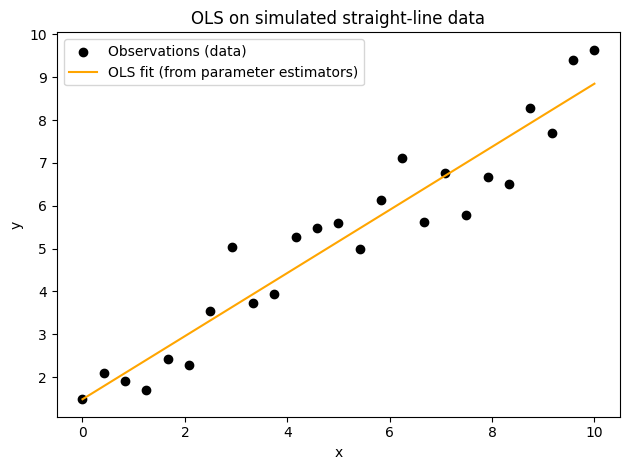

OLS:    a*=1.485, b*=0.737 (closed form)
Sigma^: MLE=0.678, unbiased=0.707


In [8]:
# Plot data and fit
# --- Simulated data ---
rng = np.random.default_rng(7)
n = 25
x = np.linspace(0, 10, n)

a_true = 1.5   # intercept
b_true = 0.8   # slope
sigma  = 0.9   # SD (constant)

y = a_true + b_true * x + rng.normal(0, sigma, size=n)

# --- Closed-form OLS ---
xbar = x.mean()
ybar = y.mean()
Sxx = np.sum((x - xbar)**2)
Sxy = np.sum((x - xbar)*(y - ybar))
b_hat = Sxy / Sxx
a_hat = ybar - b_hat * xbar


xx = np.linspace(x.min(), x.max(), 200)
yy_true = a_true + b_true * xx
yy_fit  = a_hat + b_hat * xx

# Residuals and sigma checks
y_hat = a_hat + b_hat * x
resid = y - y_hat
SSE = np.sum(resid**2)
sigma_mle = np.sqrt(SSE / n)
sigma_unb = np.sqrt(SSE / (n - 2))


plt.figure()
plt.scatter(x, y, label="Observations (data)", color='black')
# plt.plot(xx, yy_true, label="model line (from parameters)")
plt.plot(xx, yy_fit,  label="OLS fit (from parameter estimators)", color = 'orange')
plt.xlabel("x"); plt.ylabel("y")
plt.title("OLS on simulated straight-line data")
plt.legend()
plt.tight_layout()
plt.show()

# print(f"True:   a={a_true:.3f}, b={b_true:.3f}, sigma={sigma:.3f}")
print(f"OLS:    a*={a_hat:.3f}, b*={b_hat:.3f} (closed form)")
#print(f"OLS:    a*={a_hat_mat:.3f}, b*={b_hat_mat.3f} (matrix NE)")
print(f"Sigma^: MLE={sigma_mle:.3f}, unbiased={sigma_unb:.3f}")

## Estimators Compared to Model

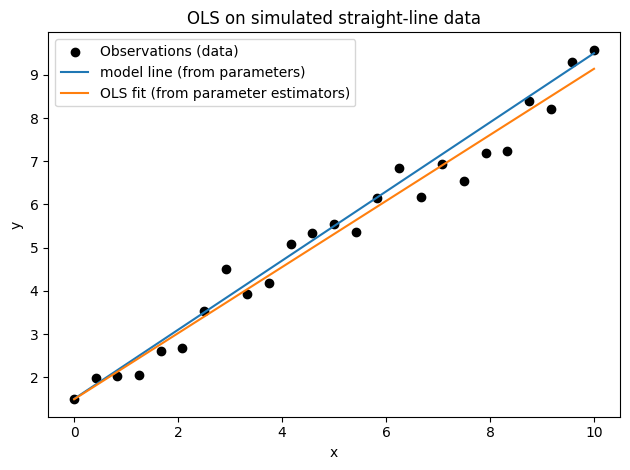

True:   a=1.500, b=0.800, sigma=0.500
OLS:    a*=1.491, b*=0.765 (closed form)
OLS:    a*=1.491, b*=0.765 (matrix NE)
Sigma^: MLE=0.377, unbiased=0.393


In [9]:
# Plot data and fit

# --- Simulated data ---
rng = np.random.default_rng(7)
n = 25
x = np.linspace(0, 10, n)

a_true = 1.5   # intercept
b_true = 0.8   # slope
sigma  = 0.5   # SD (constant)

y = a_true + b_true * x + rng.normal(0, sigma, size=n)

# --- Closed-form OLS ---
xbar = x.mean()
ybar = y.mean()
Sxx = np.sum((x - xbar)**2)
Sxy = np.sum((x - xbar)*(y - ybar))
b_hat = Sxy / Sxx
a_hat = ybar - b_hat * xbar

# --- Matrix OLS (sanity check) ---
X = design_matrix_linear(x)
a_vec, A, bvec = solve_normal_equations(X, y, w=None)
a_hat_mat, b_hat_mat = a_vec[0], a_vec[1]


xx = np.linspace(x.min(), x.max(), 200)
yy_true = a_true + b_true * xx
yy_fit  = a_hat + b_hat * xx

# Residuals and sigma checks
y_hat = a_hat + b_hat * x
resid = y - y_hat
SSE = np.sum(resid**2)
sigma_mle = np.sqrt(SSE / n)
sigma_unb = np.sqrt(SSE / (n - 2))


plt.figure()
plt.scatter(x, y, label="Observations (data)", color='black')
plt.plot(xx, yy_true, label="model line (from parameters)")
plt.plot(xx, yy_fit,  label="OLS fit (from parameter estimators)")
plt.xlabel("x"); plt.ylabel("y")
plt.title("OLS on simulated straight-line data")
plt.legend()
plt.tight_layout()
plt.show()

print(f"True:   a={a_true:.3f}, b={b_true:.3f}, sigma={sigma:.3f}")
print(f"OLS:    a*={a_hat:.3f}, b*={b_hat:.3f} (closed form)")
print(f"OLS:    a*={a_hat_mat:.3f}, b*={b_hat_mat:.3f} (matrix NE)")
print(f"Sigma^: MLE={sigma_mle:.3f}, unbiased={sigma_unb:.3f}")

## Examine Residuals

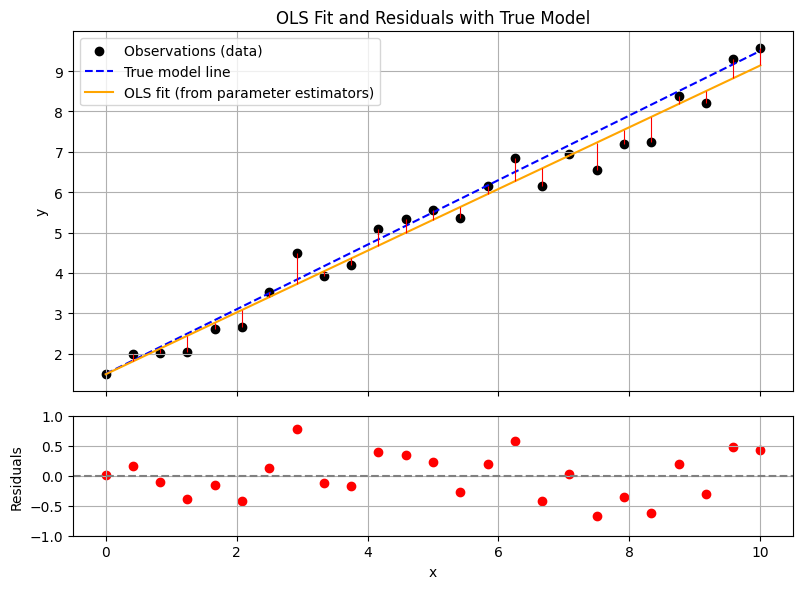

In [10]:
# Calculate residuals
y_hat = a_hat + b_hat * x
resid = y - y_hat

# Create a figure with two subplots, adjusting height ratios
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 1]}) # Adjust height ratios

# Top subplot: Data, True Model Line, and OLS fit
axes[0].scatter(x, y, label="Observations (data)", color='black')
axes[0].plot(xx, yy_true, label="True model line", color='blue', linestyle='--') # Add true model line
axes[0].plot(xx, yy_fit,  label="OLS fit (from parameter estimators)", color='orange')

# Add vertical lines from observed points to the OLS fit
for i in range(n):
    axes[0].vlines(x[i], y[i], y_hat[i], color='red', linestyle='-', linewidth=0.8)


axes[0].set_ylabel("y")
axes[0].set_title("OLS Fit and Residuals with True Model") # Updated title
axes[0].legend()
axes[0].grid(True)

# Bottom subplot: Residuals
axes[1].scatter(x, resid, color='red') # Change residual points to red
axes[1].axhline(0, color='gray', linestyle='--') # Add a horizontal line at 0
axes[1].set_xlabel("x")
axes[1].set_ylabel("Residuals")
axes[1].set_ylim([-1, 1]) # Set the vertical limits of the residuals plot
axes[1].grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

## Analyze Residual Distribution

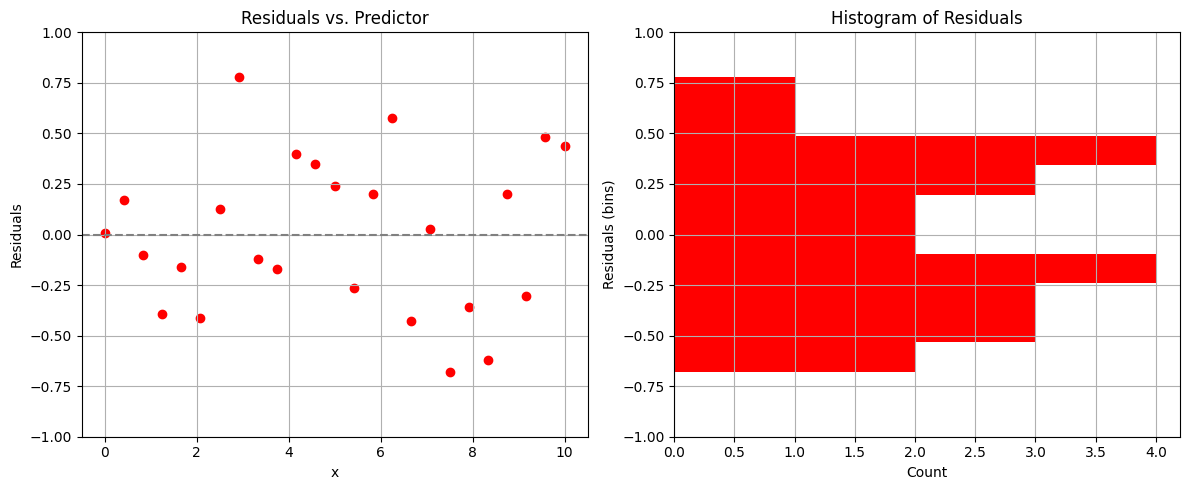

In [11]:
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Left subplot: Residuals vs x
axes[0].scatter(x, resid, color='red')
axes[0].axhline(0, color='gray', linestyle='--')
axes[0].set_xlabel("x")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Predictor")
axes[0].grid(True)
axes[0].set_ylim([-1, 1]) # Set the vertical limits

# Right subplot: Histogram of Residuals
# To have residual values on the vertical axis and counts on the horizontal,
# we need to use the 'orientation' parameter.
axes[1].hist(resid, bins=10, color='red', orientation='horizontal')
axes[1].set_xlabel("Count")
axes[1].set_ylabel("Residuals (bins)")
axes[1].set_title("Histogram of Residuals")
axes[1].grid(True)
axes[1].set_ylim([-1, 1]) # Match the vertical limits with the residuals plot

plt.tight_layout()
plt.show()

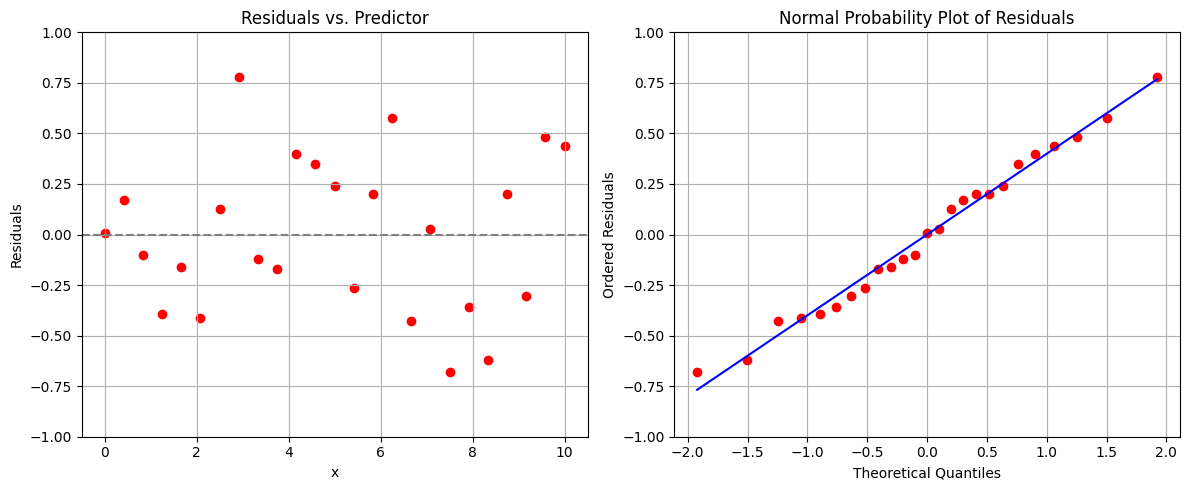

In [12]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns

# Left subplot: Residuals vs x (from cell 7e094542)
axes[0].scatter(x, resid, color='red')
axes[0].axhline(0, color='gray', linestyle='--')
axes[0].set_xlabel("x")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Residuals vs. Predictor")
axes[0].grid(True)
axes[0].set_ylim([-1, 1]) # Set the vertical limits

# Right subplot: Normalized Probability Plot of Residuals (from the original code in this cell)
stats.probplot(resid, dist="norm", plot=axes[1]) # Generate the probability plot

# Customize the right subplot
axes[1].get_lines()[0].set_color('red') # Change data points to red
axes[1].get_lines()[1].set_color('blue') # Change the fitted line to blue
axes[1].set_ylim([-1, 1]) # Set the vertical limits


axes[1].set_title("Normal Probability Plot of Residuals") # Set the title for the probability plot
axes[1].set_xlabel("Theoretical Quantiles") # Set the x-label
axes[1].set_ylabel("Ordered Residuals") # Set the y-label
axes[1].grid(True)


plt.tight_layout()
plt.show()

# What is it doing? Theoretical justification for Least Squares minimization

## Comments on Notation

#### $y_i$: the observed value of the response variable $Y$ for the $i$-th data point. In the context of regression, it's the actual measurement you have for a given predictor value $x_i$.

<br>

#### $x_i$: This represents the value of the predictor variable for the $i$-th data point. These are the independent variables or features used to predict the response.

<br>

#### $i$: an index that iterates through the individual data points or observations, typically from $1$ to $n$, where $n$ is the total number of observations.

<br>

#### $f(x_i;\boldsymbol{\beta})$: model *function* that describes the expected value of the response variable at $x_i$, parameterized by the vector $\boldsymbol{\beta}$.

For a linear model, this would be $\beta_0 + \beta_1 x_i$. It represents the systematic part of the relationship between $x$ and $y$.

<br>

#### $\boldsymbol{\beta}$: a *vector* of the model parameters that we want to estimate from the data.

For a simple linear regression, $\boldsymbol{\beta} = (\beta_0, \beta_1)^\top$, where $\beta_0$ is the intercept and $\beta_1$ is the slope.

#### $\hat{\boldsymbol{\beta}}$: the *estimators* of $\boldsymbol{\beta}$

<br>

#### $\mathcal{L}(\boldsymbol{\beta})$: likelihood function.

It quantifies how probable the observed data $(\mathbf{y})$ are, given a specific set of parameter values ($\boldsymbol{\beta}$) and the assumed probability distribution of the noise (in this case, Gaussian). Maximizing the likelihood function with respect to $\boldsymbol{\beta}$ gives the maximum likelihood estimates of the parameters.

<br>

### $\sigma_i$:  standard deviation of the noise or error for the $i$-th data point.

* In the case of ordinary least squares (OLS), $\sigma_i$ is assumed to be constant for all $i$ ($\sigma_i = \sigma$), representing *homoscedasticity*.

* In weighted least squares (WLS), $\sigma_i$ can vary for each data point, representing *heteroscedasticity*, and is assumed to be known or estimated independently. The weight $w_i$ is defined as $1/\sigma_i^2$.

## The model (assumptions)

Consider a series of independent observations $(x_i, y_i)$ for $i=1,\dots,n$ for which the response variable is denoted by $Y$.
* Model (linear in parameters):
  
  $$
f(x_i;\boldsymbol{\beta}) \;=\; \sum_{j=0}^{p-1} \beta_j\,\phi_j(x_i),
$$
  
  where $\{\phi_j\}$ are chosen basis functions (e.g., $\phi_0=1$, $\phi_1(x)=x$ for a line), and $\boldsymbol{\beta}=(\beta_0, \dots, \beta_{p-1})^\top$ is the parameter vector. The model is thus of the form $Y = \beta_0 + \beta_1 x + \epsilon$, where $\epsilon$ is the random error. An observation would thus be $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$.
  
* Noise model (possibly heteroscedastic):
  
  $$
Y_i \mid x_i \;\sim\; \mathcal{N}\!\big(f(x_i;\boldsymbol{\beta}),\,\sigma_i^2\big).
$$
* Likelihood $\mathcal{L}$, log-likelihood $\mathcal{W}=\log \mathcal{L}$, least-squares sum $\mathcal{M}$.
* Estimators are indicated with a caret (e.g., $\hat{\boldsymbol{\beta}}$). Averages use bars (e.g., $\bar{x}$). The residual for each observation pair $(x_i, y_i)$ is $e_i = y_i - \hat{y}_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i)$.



## From Gaussian likelihood to (weighted) least squares

The likelihood function for independent normally distributed measurements is given by:

<br>

$$
\mathcal{L}(\boldsymbol{\beta}) \;=\; \prod_{i=1}^n \frac{1}{\sqrt{2\pi}\,\sigma_i}
\exp\!\left[-\frac{\big(y_i - f(x_i;\boldsymbol{\beta})\big)^2}{2\sigma_i^2}\right].
$$

<br>

Note that $\boldsymbol{\beta}$ is a vector with the parameters we want to estimate. The log likelihood is then:

<br>

$$
\mathcal{W}(\boldsymbol{\beta}) \;=\; \sum_{i=1}^n \left[-\tfrac{1}{2}\log(2\pi)-\log\sigma_i
-\frac{\big(y_i - f(x_i;\boldsymbol{\beta})\big)^2}{2\sigma_i^2}\right].
$$

<br>

Maximizing $\mathcal{W}$ is equivalent to minimizing

<br>

$$
\mathcal{M}(\boldsymbol{\beta})
\;=\; \sum_{i=1}^n w_i\,\big(y_i - f(x_i;\boldsymbol{\beta})\big)^2,
\qquad
w_i \;=\; \frac{1}{\sigma_i^{2}}.
$$

<br>

This is **weighted least squares (WLS)**. If all $\sigma_i=\sigma$, the common factor cancels and we recover **ordinary least squares (OLS)**.



# Visualization of Mutual Information (not covered)

This code calculates the mutual information between all pairs of variables in the `df` DataFrame (which contains the Anscombe's Quartet data). `mutual_info_regression` is used as our variables are continuous. The results are stored in a new DataFrame and displayed.

Keep in mind that interpreting mutual information values requires context and can be more complex than interpreting correlation coefficients. Higher values generally indicate stronger dependence.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Load the Anscombe's Quartet data
# Assuming the dataframe 'df' is already loaded from previous cells
# If not, you can load it again:
# df = pd.read_csv('anscombe_quartet.csv')

# Prepare the data for mutual information calculation
# We'll treat each column as a potential feature and calculate mutual information
# between all pairs. Mutual information is symmetric, so we only need to calculate
# the upper triangle of the matrix.

cols = df.columns
n_cols = len(cols)
mutual_info_matrix = pd.DataFrame(index=cols, columns=cols)

for i in range(n_cols):
    for j in range(i, n_cols):
        col1 = cols[i]
        col2 = cols[j]

        # Mutual information for continuous variables
        # Reshape the data to be 2D arrays as required by mutual_info_regression
        mi = mutual_info_regression(df[[col1]], df[col2])[0]

        mutual_info_matrix.loc[col1, col2] = mi
        mutual_info_matrix.loc[col2, col1] = mi # Mutual information is symmetric

display(mutual_info_matrix)

,x1,y1,x2,y2,x3,y3,x4,y4
x1,0.928968,0.359271,0.951696,0.372691,0.898665,0.48088,0.030303,0
y1,0.359271,1.095635,0.359271,0.279942,0.34715,0.189538,0.030303,0
x2,0.951696,0.359271,1.035029,0.372691,0.981999,0.511183,0.060606,0
y2,0.372691,0.279942,0.372691,1.095635,0.402994,0.246753,0.060606,0
x3,0.898665,0.34715,0.981999,0.402994,0.959271,0.48088,0.030303,0
y3,0.48088,0.189538,0.511183,0.246753,0.48088,1.012302,0.009091,0
x4,0.030303,0.030303,0.060606,0.060606,0.030303,0.009091,0.178175,0.091162
y4,0,0,0,0,0,0,0.091162,1.095635


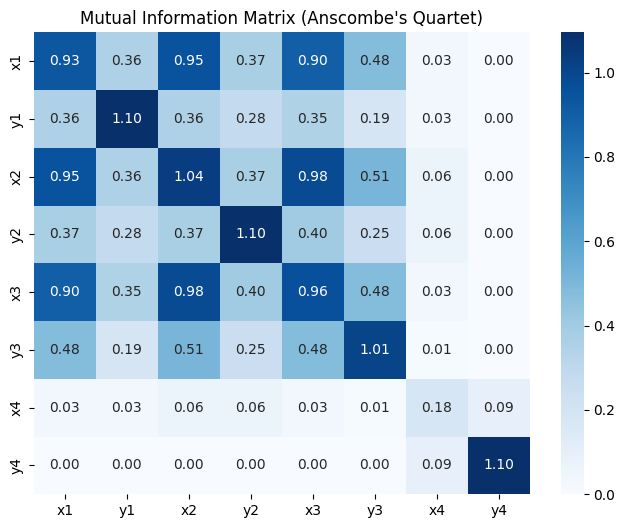

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the mutual information matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(mutual_info_matrix.astype(float), annot=True, cmap='Blues', fmt=".2f")
plt.title('Mutual Information Matrix (Anscombe\'s Quartet)')
plt.show()

# CONFIDENCE INTERVALS FOR OLS FIT TO A LINE

## Plot

OLS on simple linear data (constant σ):
a_hat = 3.2545 ± 1.5049  (95% CI: 1.7496, 4.7594)
b_hat = 0.5189 ± 0.2584  (95% CI: 0.2604, 0.7773)
Residual SD (unbiased) = 2.0625,   R^2 = 0.377,   df = 28


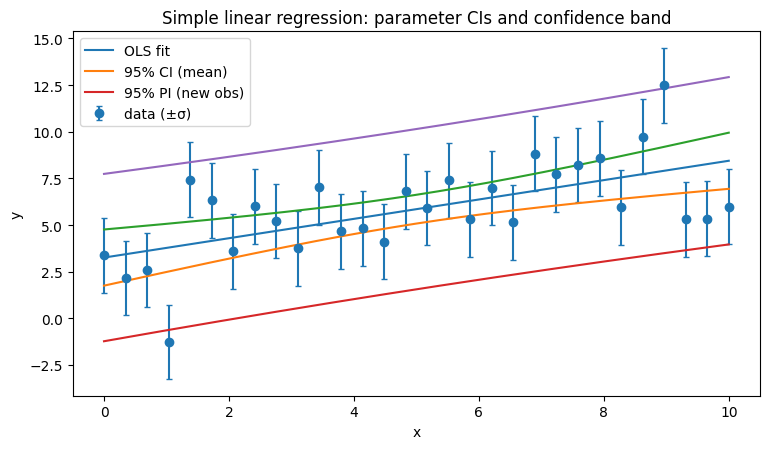

At x0=5.00:  mean CI = (5.078, 6.620);  pred. interval = (1.554, 10.143)


In [13]:
# Simple linear model: CIs for parameters and for the mean response (plus optional prediction band)
# - Simulates y = a + b x + ε with constant σ
# - Fits OLS via normal equations
# - Prints 95% CIs for a and b
# - Plots data (now with BLUE error bars), fitted line, 95% confidence band, and (optionally) prediction band

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------ CONFIG (edit me) ------------------------------
RNG_SEED     = 2
N_POINTS     = 30
X_MIN, X_MAX = 0.0, 10.0

A_TRUE = 3.0      # intercept
B_TRUE = 0.6      # slope
SIGMA  = 2      # SD of additive noise (constant)

SHOW_ERRORBARS   = True     # draw BLUE error bars using known σ  (changed from False → True)
SHOW_PRED_BAND   = True     # also draw 95% prediction band
ALPHA_CI         = 0.05     # 95% intervals
# ------------------------------------------------------------------------------

rng = np.random.default_rng(RNG_SEED)
x = np.linspace(X_MIN, X_MAX, N_POINTS)
y_true = A_TRUE + B_TRUE * x
y = y_true + rng.normal(0.0, SIGMA, size=N_POINTS)

# Design matrix and OLS via normal equations
X = np.column_stack([np.ones_like(x), x])
A = X.T @ X
b = X.T @ y
beta = np.linalg.solve(A, b)  # [a_hat, b_hat]
a_hat, b_hat = beta

# Residuals and variance estimate
y_hat = X @ beta
resid = y - y_hat
n, p = X.shape
nu = n - p
SSE = float(np.sum(resid**2))
sigma2_hat = SSE / nu

# Covariance and SEs of coefficients
XtX_inv = np.linalg.inv(A)
cov_beta = sigma2_hat * XtX_inv
se_beta = np.sqrt(np.diag(cov_beta))

# t* quantile (scipy if available, else normal approx)
try:
    from scipy import stats
    tstar = stats.t.ppf(1 - ALPHA_CI/2, nu)
except Exception:
    tstar = 1.96

# 95% CIs for parameters
ci_a = (a_hat - tstar*se_beta[0], a_hat + tstar*se_beta[0])
ci_b = (b_hat - tstar*se_beta[1], b_hat + tstar*se_beta[1])

# R^2 (for completeness)
SST = float(np.sum((y - y.mean())**2))
R2  = 1.0 - SSE / SST

print("OLS on simple linear data (constant σ):")
print(f"a_hat = {a_hat:.4f} ± {tstar*se_beta[0]:.4f}  (95% CI: {ci_a[0]:.4f}, {ci_a[1]:.4f})")
print(f"b_hat = {b_hat:.4f} ± {tstar*se_beta[1]:.4f}  (95% CI: {ci_b[0]:.4f}, {ci_b[1]:.4f})")
print(f"Residual SD (unbiased) = {np.sqrt(sigma2_hat):.4f},   R^2 = {R2:.3f},   df = {nu}")

# Confidence band for the mean response and (optional) prediction band
xx  = np.linspace(X_MIN, X_MAX, 300)
Xx  = np.column_stack([np.ones_like(xx), xx])
yfit = Xx @ beta

# Leverage h(x) = x_row @ (X'X)^{-1} @ x_row^T
h = np.sum(Xx @ XtX_inv * Xx, axis=1)
se_mean = np.sqrt(sigma2_hat * h)
if SHOW_PRED_BAND:
    se_pred = np.sqrt(sigma2_hat * (1.0 + h))  # extra +1 for new observation

# Plot
plt.figure(figsize=(7.8, 4.6))

# Data (with BLUE error bars at known σ)
if SHOW_ERRORBARS:
    plt.errorbar(
        x, y,
        yerr=SIGMA,
        fmt='o',
        capsize=2.0,
        color='C0',   # blue points
        ecolor='C0',  # blue error bars
        label="data (±σ)"
    )
else:
    plt.scatter(x, y, color='C0', label="data")  # blue points if error bars are off

# Fitted line
plt.plot(xx, yfit, label="OLS fit")

# 95% CI (mean)
plt.plot(xx, yfit - tstar*se_mean, label="95% CI (mean)")
plt.plot(xx, yfit + tstar*se_mean)

# 95% prediction band (optional)
if SHOW_PRED_BAND:
    plt.plot(xx, yfit - tstar*se_pred, label="95% PI (new obs)")
    plt.plot(xx, yfit + tstar*se_pred)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Simple linear regression: parameter CIs and confidence band")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: CI for mean response and prediction interval at a specific x0
x0 = 5.0
row = np.array([1.0, x0])
h0 = float(row @ XtX_inv @ row.T)
se_mean0 = np.sqrt(sigma2_hat * h0)
L_mean0, U_mean0 = (row @ beta - tstar*se_mean0, row @ beta + tstar*se_mean0)
if SHOW_PRED_BAND:
    se_pred0 = np.sqrt(sigma2_hat * (1.0 + h0))
    L_pred0, U_pred0 = (row @ beta - tstar*se_pred0, row @ beta + tstar*se_pred0)
    print(f"At x0={x0:.2f}:  mean CI = ({L_mean0:.3f}, {U_mean0:.3f});  pred. interval = ({L_pred0:.3f}, {U_pred0:.3f})")
else:
    print(f"At x0={x0:.2f}:  mean CI = ({L_mean0:.3f}, {U_mean0:.3f})")


## Confidence intervals in simple linear regression

**Model and assumptions.** We observe pairs $(x_i,y_i)$ for $i=1,\dots,n$ and posit the linear model
$$
y_i \;=\; a + b\,x_i + \varepsilon_i, \qquad \varepsilon_i \stackrel{\text{i.i.d.}}{\sim} \mathcal{N}(0,\sigma^2).
$$
Let $\bar{x}=\tfrac{1}{n}\sum_i x_i$, $\bar{y}=\tfrac{1}{n}\sum_i y_i$, and
$$
S_{xx}=\sum_{i=1}^n (x_i-\bar{x})^2, \qquad
S_{xy}=\sum_{i=1}^n (x_i-\bar{x})(y_i-\bar{y}).
$$
The ordinary least squares (OLS) estimates are
$$
\hat{b}=\frac{S_{xy}}{S_{xx}}, \qquad
\hat{a}=\bar{y}-\hat{b}\,\bar{x}.
$$
With residuals $r_i = y_i-(\hat{a}+\hat{b}x_i)$ and $\mathrm{SSE}=\sum_i r_i^2$, the unbiased variance estimate is
$$
\widehat{\sigma}^{\,2} \;=\; \frac{\mathrm{SSE}}{n-2}, \qquad \nu=n-2 \ \text{(degrees of freedom)}.
$$
When $\sigma^2$ is unknown, uncertainty for $(\hat{a},\hat{b})$ uses the Student-$t$ distribution with df $=\nu$.

---

### Standard errors and 95% confidence intervals for $a$ and $b$

Closed-form standard errors:
$$
\mathrm{SE}(\hat{b}) \;=\; \sqrt{\frac{\widehat{\sigma}^{\,2}}{S_{xx}}}, \qquad
\mathrm{SE}(\hat{a}) \;=\; \sqrt{\widehat{\sigma}^{\,2}\!\left(\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}\right)}.
$$

Let $t^* = t_{1-\alpha/2,\ \nu}$ (e.g., $t^*$ for $\alpha=0.05$ gives 95% CIs).
Then

$$
\hat{b} \;\pm\; t^*\,\mathrm{SE}(\hat{b}), \qquad
\hat{a} \;\pm\; t^*\,\mathrm{SE}(\hat{a}).
$$


---

### Confidence band for the mean response at a point $x_0$

The fitted mean at $x_0$ is $\hat{y}(x_0)=\hat{a}+\hat{b}\,x_0$. Its standard error is
$$
\mathrm{SE}_{\text{mean}}(x_0)
= \sqrt{\widehat{\sigma}^{\,2}\!\left(\frac{1}{n} + \frac{(x_0-\bar{x})^2}{S_{xx}}\right)}.
$$
A 95% pointwise confidence interval for the mean response is
$$
\hat{y}(x_0)\ \pm\ t^*\,\mathrm{SE}_{\text{mean}}(x_0).
$$

*(Matrix view.)* If $X=[\mathbf{1}\ \ \mathbf{x}]$ and $\mathbf{x}_0^\top=[1\ \ x_0]$, then
$$
\mathrm{SE}_{\text{mean}}(x_0) \;=\; \sqrt{\widehat{\sigma}^{\,2}\,\mathbf{x}_0^\top (X^\top X)^{-1}\mathbf{x}_0},
$$
which is equivalent to the scalar formula above.

---

### Prediction interval for a new observation at $x_0$ (optional)

A single new $Y_{\text{new}}(x_0)$ has extra random noise $\varepsilon$. The standard deviation becomes
$$
\mathrm{SE}_{\text{pred}}(x_0)
= \sqrt{\widehat{\sigma}^{\,2}\!\left(1 + \frac{1}{n} + \frac{(x_0-\bar{x})^2}{S_{xx}}\right)}
= \sqrt{\widehat{\sigma}^{\,2}\!\left(1 + \mathbf{x}_0^\top (X^\top X)^{-1}\mathbf{x}_0\right)}.
$$
Thus a 95% prediction interval is
$$
\hat{y}(x_0)\ \pm\ t^*\,\mathrm{SE}_{\text{pred}}(x_0).
$$

---

**Interpretation.** The parameter CIs quantify uncertainty in $(a,b)$. The **confidence band** describes uncertainty in the *mean* line, shrinking near $\bar{x}$ and widening as $x_0$ moves away (via $(x_0-\bar{x})^2/S_{xx}$). The **prediction interval** is wider by an added $\widehat{\sigma}$ term to account for irreducible observation noise. These results rely on the linear model with i.i.d. homoscedastic normal errors; for large $n$, the $t$-based intervals are also fairly robust to mild deviations from normality.
